C:\Users\jed95\AppData\Local\Temp\ipykernel_4316\512887901.py:102: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, fontsize=15, loc='center right', bbox_to_anchor=(1.25, 0.5))


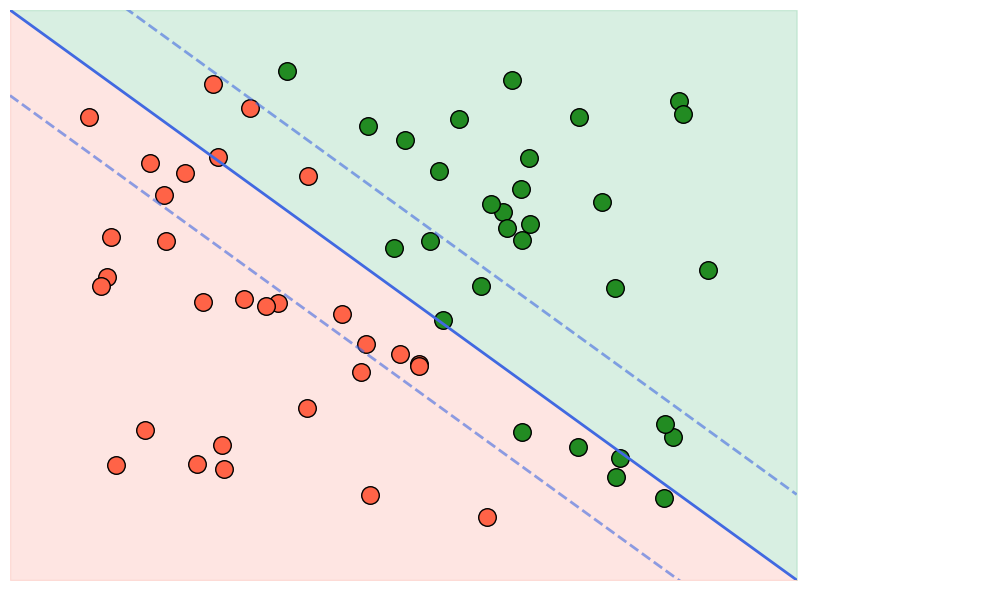

In [ ]:
# ------------------------------------------------------------
#  NEW -- draw an S-curve boundary y = y_min + L / (1+exp(k·(x-x0)))
# ------------------------------------------------------------
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'DFKai-sb'
def s_curve(x, *, k=1.0, x0=5.0):
    """
    Down-sloping logistic curve that *exactly* passes:
        (0,10) → upper anchor
        (5, 5) → mid anchor (by symmetry)
        (10,0) → lower anchor
    k   : positive steepness (higher = sharper bend)
    x0  : horizontal centre (fixed at 5 to hit the mid-anchor)
    """
    # Helper value A = 1 / (1 + e^{-k·(x0)})
    A = 1.0 / (1.0 + np.exp(-k * x0))         # here x0 = 5, so A = 1/(1+e^{-5k})

    # Solve for L (height) so y(0)=10 and y(10)=0 are satisfied
    L = 5.0 / (A - 0.5)                       # see analytic derivation
    y_min = 5.0 - L / 2.0                     # ensures y(x0)=5

    return y_min + L / (1.0 + np.exp(k * (x - x0)))
def sample_by_curve(n_red, n_green, *,
                    k=1.0, x0=5.0,
                    xlim=(1, 9), ylim=(1, 9),
                    seed=None, batch=256):
    """
    Randomly generate:
        • n_red   points with  y < s_curve(x)
        • n_green points with  y > s_curve(x)
    Returns: red_pts  (n_red  × 2), green_pts (n_green × 2)
    """
    rng = np.random.default_rng(seed)
    red_x, red_y, green_x, green_y = [], [], [], []

    while len(red_x) < n_red or len(green_x) < n_green:
        # propose a batch of candidates
        x_prop = rng.uniform(*xlim, size=batch)
        y_prop = rng.uniform(*ylim, size=batch)
        boundary = s_curve(x_prop, k=k, x0=x0)

        # classify the proposals
        mask_red   = (y_prop < boundary-0.5) & (len(red_x)   < n_red)
        mask_green = (y_prop > boundary+0.5) & (len(green_x) < n_green)

        red_x.extend(x_prop[mask_red])
        red_y.extend(y_prop[mask_red])
        green_x.extend(x_prop[mask_green])
        green_y.extend(y_prop[mask_green])

    red_pts   = np.column_stack([red_x[:n_red],   red_y[:n_red]])
    green_pts = np.column_stack([green_x[:n_green], green_y[:n_green]])
    return red_pts, green_pts
red_pts, green_pts = sample_by_curve(30, 30, k=1.0, seed=202)
# Prepare the canvas
fig, ax = plt.subplots(figsize=(10, 6))
x_vals = np.linspace(0, 10, 200)
b = 10                           # vertical intercept — adjust to taste
boundary = -x_vals + b
ax.plot(x_vals, boundary, color='royalblue', linewidth=2)

ax.plot(x_vals, -x_vals + 8.5,
            linestyle='--', linewidth=2,
            color='royalblue', alpha=0.6,  )
ax.plot(x_vals, -x_vals + 11.5,
            linestyle='--', linewidth=2,
            color='royalblue', alpha=0.6,  )

# Shade the two half-planes defined by the S-curve
ax.fill_between(x_vals, boundary, 10,  color='mediumseagreen', alpha=0.2)
ax.fill_between(x_vals, 0,        boundary, color='salmon',       alpha=0.2)



# ----------------------------------------------------------------
#  Scatter the existing data points
# ----------------------------------------------------------------
ax.scatter(red_pts[:, 0],   red_pts[:, 1],
           s=160, color='tomato',      edgecolor='black')
ax.scatter(green_pts[:, 0], green_pts[:, 1],
           s=160, color='forestgreen', edgecolor='black')

# ----------------------------------------------------------------
#  Fancy arrow-style axes (exact look & feel as before)
# ----------------------------------------------------------------
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

arrow_props = dict(arrowstyle='-|>', linewidth=2, color='black')
ax.annotate('', xy=(11.2, 0), xytext=(0, 0), arrowprops=arrow_props)
ax.annotate('', xy=(0, 11.2), xytext=(0, 0), arrowprops=arrow_props)

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xticks([]); ax.set_yticks([])



# Legend (includes the new boundary)
ax.legend(frameon=False, fontsize=15, loc='center right', bbox_to_anchor=(1.25, 0.5))

plt.tight_layout()
plt.show()


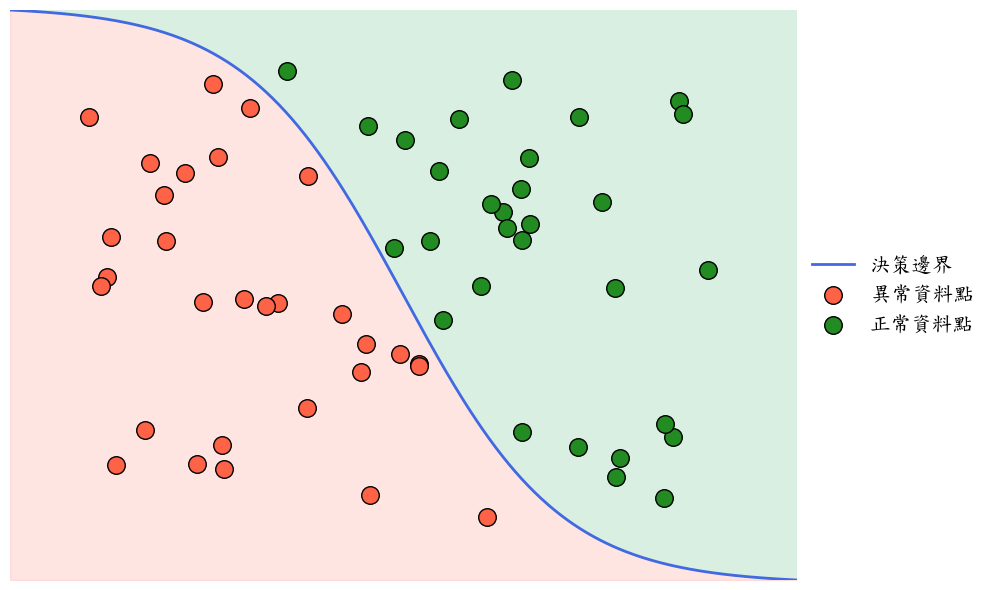

In [ ]:
# ------------------------------------------------------------
#  NEW -- draw an S-curve boundary y = y_min + L / (1+exp(k·(x-x0)))
# ------------------------------------------------------------
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'DFKai-sb'
def s_curve(x, *, k=1.0, x0=5.0):
    """
    Down-sloping logistic curve that *exactly* passes:
        (0,10) → upper anchor
        (5, 5) → mid anchor (by symmetry)
        (10,0) → lower anchor
    k   : positive steepness (higher = sharper bend)
    x0  : horizontal centre (fixed at 5 to hit the mid-anchor)
    """
    # Helper value A = 1 / (1 + e^{-k·(x0)})
    A = 1.0 / (1.0 + np.exp(-k * x0))         # here x0 = 5, so A = 1/(1+e^{-5k})

    # Solve for L (height) so y(0)=10 and y(10)=0 are satisfied
    L = 5.0 / (A - 0.5)                       # see analytic derivation
    y_min = 5.0 - L / 2.0                     # ensures y(x0)=5

    return y_min + L / (1.0 + np.exp(k * (x - x0)))
def sample_by_curve(n_red, n_green, *,
                    k=1.0, x0=5.0,
                    xlim=(1, 9), ylim=(1, 9),
                    seed=None, batch=256):
    """
    Randomly generate:
        • n_red   points with  y < s_curve(x)
        • n_green points with  y > s_curve(x)
    Returns: red_pts  (n_red  × 2), green_pts (n_green × 2)
    """
    rng = np.random.default_rng(seed)
    red_x, red_y, green_x, green_y = [], [], [], []

    while len(red_x) < n_red or len(green_x) < n_green:
        # propose a batch of candidates
        x_prop = rng.uniform(*xlim, size=batch)
        y_prop = rng.uniform(*ylim, size=batch)
        boundary = s_curve(x_prop, k=k, x0=x0)

        # classify the proposals
        mask_red   = (y_prop < boundary-0.5) & (len(red_x)   < n_red)
        mask_green = (y_prop > boundary+0.5) & (len(green_x) < n_green)

        red_x.extend(x_prop[mask_red])
        red_y.extend(y_prop[mask_red])
        green_x.extend(x_prop[mask_green])
        green_y.extend(y_prop[mask_green])

    red_pts   = np.column_stack([red_x[:n_red],   red_y[:n_red]])
    green_pts = np.column_stack([green_x[:n_green], green_y[:n_green]])
    return red_pts, green_pts
red_pts, green_pts = sample_by_curve(30, 30, k=1.0, seed=202)
# Prepare the canvas
fig, ax = plt.subplots(figsize=(10, 6))

# X-range for the curve & shading
x_vals = np.linspace(0, 11, 400)
s_vals = s_curve(x_vals)

# Shade the two half-planes defined by the S-curve
ax.fill_between(x_vals, s_vals, 11, color='mediumseagreen', alpha=0.20)
ax.fill_between(x_vals, 0,      s_vals, color='salmon',        alpha=0.20)

# Plot the S-curve itself
ax.plot(x_vals, s_vals, color='royalblue', linewidth=2, label='決策邊界')

# ----------------------------------------------------------------
#  Scatter the existing data points
# ----------------------------------------------------------------
ax.scatter(red_pts[:, 0],   red_pts[:, 1],
           s=160, color='tomato',      edgecolor='black', label='異常資料點')
ax.scatter(green_pts[:, 0], green_pts[:, 1],
           s=160, color='forestgreen', edgecolor='black', label='正常資料點')

# ----------------------------------------------------------------
#  Fancy arrow-style axes (exact look & feel as before)
# ----------------------------------------------------------------
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

arrow_props = dict(arrowstyle='-|>', linewidth=2, color='black')
ax.annotate('', xy=(11.2, 0), xytext=(0, 0), arrowprops=arrow_props)
ax.annotate('', xy=(0, 11.2), xytext=(0, 0), arrowprops=arrow_props)

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xticks([]); ax.set_yticks([])



# Legend (includes the new boundary)
ax.legend(frameon=False, fontsize=15, loc='center right', bbox_to_anchor=(1.25, 0.5))

plt.tight_layout()
plt.show()
